<a href="https://colab.research.google.com/github/Rezamoghadam8810/Algorithmic_trading_tutorial/blob/main/Short_Selling_and_Short_Position_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Short Selling / Short Positions**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

In [3]:
close = pd.read_csv('/content/close.csv', index_col="Date",parse_dates=["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,108.406677,383.614990,1.262834,1214.599976,39.088596,16804.710938
2014-10-02,107.971893,375.071991,1.262419,1214.199951,38.969368,16801.050781
2014-10-03,109.876198,359.511993,1.267058,1192.199951,39.250412,17009.689453
2014-10-04,NaN,328.865997,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.510010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.369995,39294.199219,1.224909,1901.300049,243.728592,34323.050781
2021-05-27,250.699997,38436.968750,1.219260,1895.699951,241.615891,34464.640625
2021-05-28,247.020004,35697.605469,1.219319,1902.500000,241.974457,34529.449219


In [7]:
close["USDEUR=X"] = 1/close["EURUSD=X"]
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
Date,,,,,,,
2014-10-01,108.406677,383.614990,0.791870,1214.599976,39.088596,16804.710938,1.262834
2014-10-02,107.971893,375.071991,0.792130,1214.199951,38.969368,16801.050781,1.262419
2014-10-03,109.876198,359.511993,0.789230,1192.199951,39.250412,17009.689453,1.267058
2014-10-04,NaN,328.865997,NaN,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.510010,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-26,241.369995,39294.199219,0.816387,1901.300049,243.728592,34323.050781,1.224909
2021-05-27,250.699997,38436.968750,0.820170,1895.699951,241.615891,34464.640625,1.219260
2021-05-28,247.020004,35697.605469,0.820130,1902.500000,241.974457,34529.449219,1.219319


In [8]:
fx = close[["EURUSD=X","USDEUR=X"]].dropna().copy()
fx

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,0.791870,1.262834
2014-10-02,0.792130,1.262419
2014-10-03,0.789230,1.267058
2014-10-06,0.799130,1.251361
2014-10-07,0.790760,1.264606
...,...,...
2021-05-24,0.820800,1.218324
2021-05-25,0.818690,1.221464
2021-05-26,0.816387,1.224909


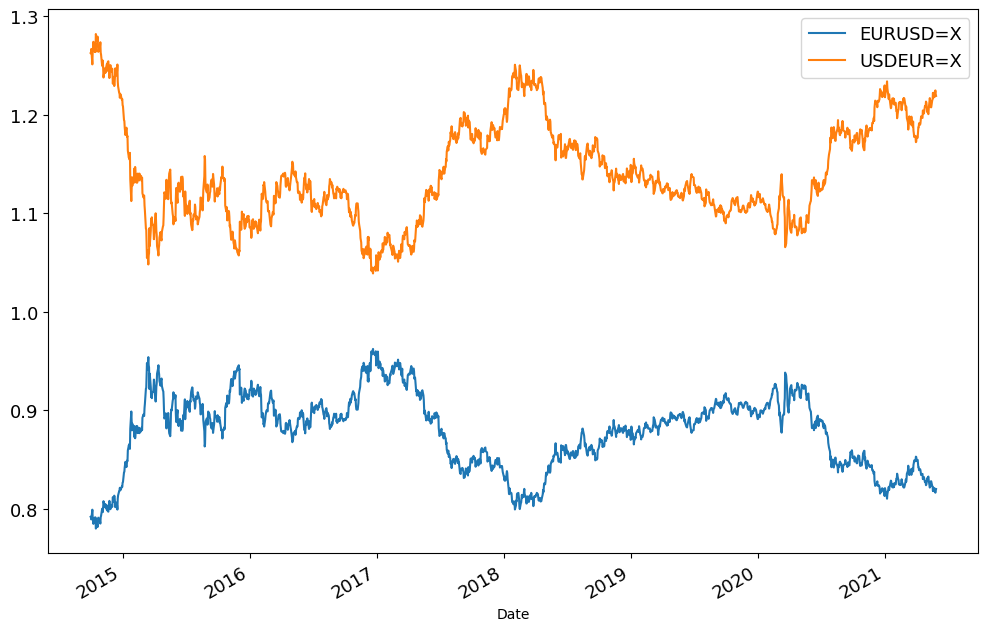

In [10]:
fx.plot(figsize=(12,8),fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [11]:
simple_ret = fx.pct_change() #simple returns
simple_ret

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,NaN,NaN
2014-10-02,0.000328,-0.000328
2014-10-03,-0.003661,0.003674
2014-10-06,0.012544,-0.012389
2014-10-07,-0.010474,0.010585
...,...,...
2021-05-24,0.003460,-0.003448
2021-05-25,-0.002571,0.002577
2021-05-26,-0.002813,0.002821


# ***For simple returns: log position returns != Short positions returns * (-1) ***

In [12]:
simple_ret.add(1).prod() -1 # compound simple returns

,0
EURUSD=X,0.035688
USDEUR=X,-0.034458


In [13]:
log_ret=np.log(fx/fx.shift()) #log returns
log_ret

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,NaN,NaN
2014-10-02,0.000328,-0.000328
2014-10-03,-0.003668,0.003668
2014-10-06,0.012466,-0.012466
2014-10-07,-0.010529,0.010529
...,...,...
2021-05-24,0.003454,-0.003454
2021-05-25,-0.002574,0.002574
2021-05-26,-0.002817,0.002817


In [14]:
log_ret.sum() #cumulative log returns

,0
EURUSD=X,0.035066
USDEUR=X,-0.035066


# ***For log returns: long position returns == short positions returns * (-1)***

In [16]:
norm_fx=log_ret.cumsum().apply(np.exp) #normalized prices (Base 1)
norm_fx

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,NaN,NaN
2014-10-02,1.000328,0.999672
2014-10-03,0.996666,1.003345
2014-10-06,1.009168,0.990915
2014-10-07,0.998598,1.001404
...,...,...
2021-05-24,1.036534,0.964754
2021-05-25,1.033869,0.967240
2021-05-26,1.030961,0.969969


In [17]:
norm_fx.iloc[0] = [1,1]

In [18]:
norm_fx

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,1.000000,1.000000
2014-10-02,1.000328,0.999672
2014-10-03,0.996666,1.003345
2014-10-06,1.009168,0.990915
2014-10-07,0.998598,1.001404
...,...,...
2021-05-24,1.036534,0.964754
2021-05-25,1.033869,0.967240
2021-05-26,1.030961,0.969969


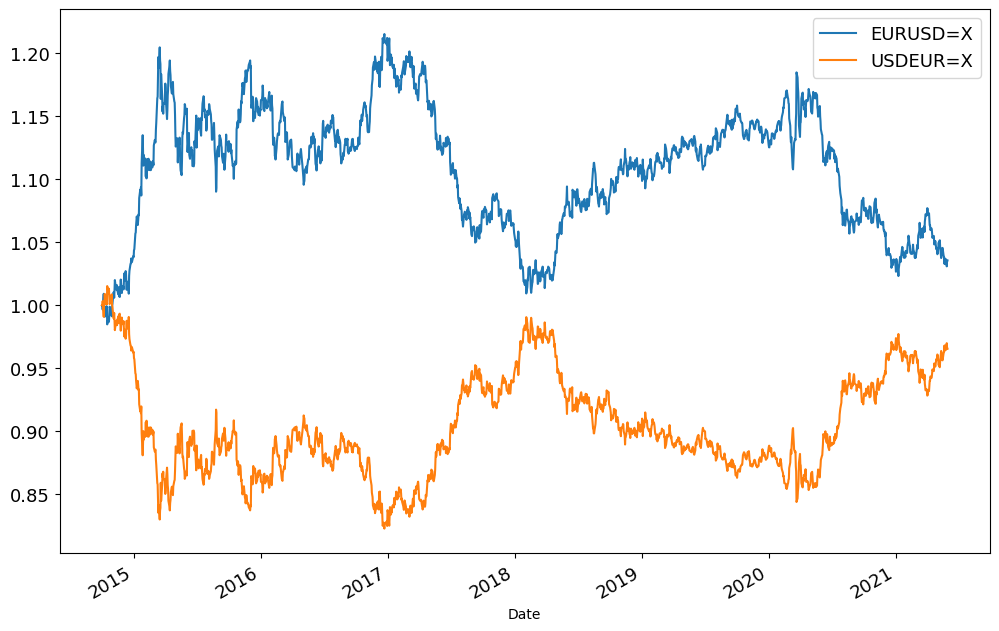

In [19]:
norm_fx.plot(figsize=(12,8),fontsize=13)
plt.legend(fontsize=13)
plt.show()